In [2]:
from dicke_h import *
from qutip import *
from time import clock
import matplotlib.pyplot as plt

In [3]:
N = 2
ntls = N
nds = num_dicke_states(N)
[jx, jy, jz, jp, jm] = j_algebra(N)

In [4]:
gE = np.sqrt(2)
gD = 0.444
gP = 0.1

gCE = 1
gCD = np.pi
gCP = 1.3

w0 = 0.2
wi = 2

h0 = w0 * jz
hint = wi * jx
h = h0 #+ hint

#set initial conditions for spins
system = Dicke(hamiltonian = h, N = N, loss = gE, pumping = gP, dephasing = gD, emission = gCE, collective_pumping = gCP, collective_dephasing = gCD)
lind = system.lindblad()
liouv = system.liouvillian()

In [40]:
file_save = True
file_load = True
if file_save is True:
#Save to file (sparse)
    saveto_file_name = str("lindblad_data_N={}.npz".format(N))
    save_npz('{}'.format(saveto_file_name), lind.data)
    print("Lindbladian data saved from {} in {}".format(str("lind"),saveto_file_name))    
if file_load is True:
#Load from file (sparse)
    loadfrom_file_name = str("lindblad_data_N={}.npz".format(N))
    lind_data = load_npz('{}'.format(loadfrom_file_name))
    print("Lindbladian data loaded from {} into {}".format(loadfrom_file_name, str("lind_data")))

Lindbladian data saved from lind in lindblad_data_N=2.npz
Lindbladian data loaded from lindblad_data_N=2.npz into lind_data


In [21]:
a = 1/np.sqrt(2)
b = 1/np.sqrt(2)
css_symmetric = system.css_10(a,b)
css_antisymmetric = system.css_10(a,-b)
excited = system.dicke(N/2,N/2)
superradiant = system.dicke(N/2,0)
subradiant = system.dicke(j_min(N),-j_min(N))
ground = system.dicke(N/2,-N/2)
ghz = system.ghz()

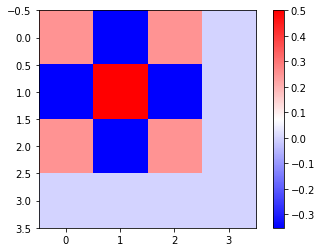

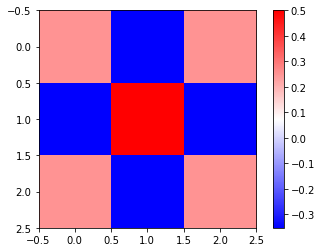

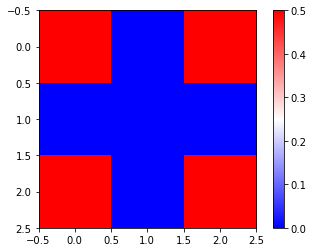

In [22]:
plt.imshow(np.real(css_antisymmetric.full()), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()
#
plt.imshow(np.real(css_antisymmetric.full())[:N+1,:N+1], cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()
#
plt.imshow(np.real(ghz.full()[:N+1,:N+1]), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()

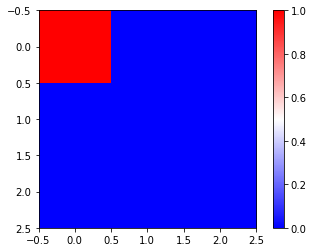

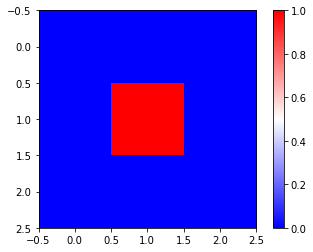

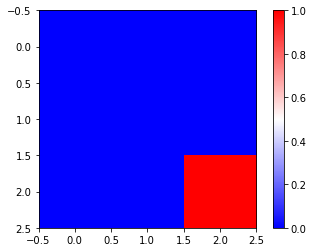

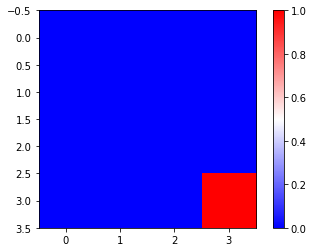

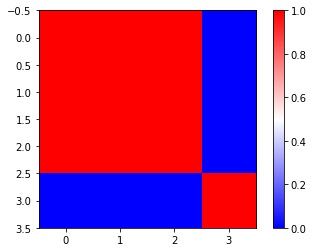

In [23]:
#Dicke states
#
plt.imshow(np.real(excited.full()[:N+1,:N+1]), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()
#
plt.imshow(np.real(superradiant.full()[:N+1,:N+1]), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()
#
plt.imshow(np.real(ground.full()[:N+1,:N+1]), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()
#
plt.imshow(np.real(subradiant.full()), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()
#
plt.imshow(np.real(block_matrix(N).todense()), cmap = 'bwr')
plt.colorbar()
plt.show()
plt.close()

In [27]:
t = np.linspace(0, 5, 100)
system.hamiltonian = h
rho0 = excited
result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm], options = Options(store_states=True))
rhot = result.states
jz_t = result.expect[0]
jpjm_t = result.expect[1]

tr_rho=[]
for i in range(0,np.size(rhot)):
    tr_rho.append(rhot[i].norm())

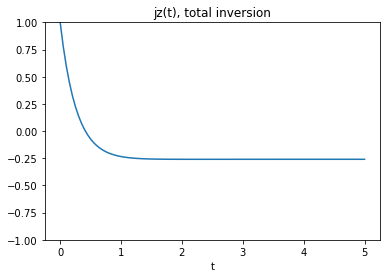

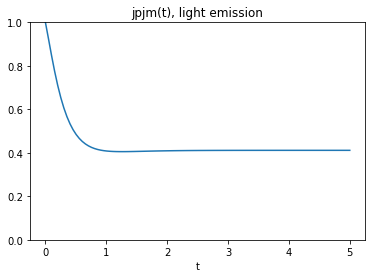

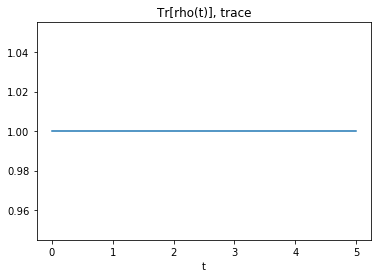

In [28]:
jmax = (0.5 * N)
j2max = (0.5 * N + 1) * (0.5 * N)
fig1 = plt.figure()
plt.plot(t, jz_t)
plt.ylim([-1,1])
plt.title('jz(t), total inversion')
plt.xlabel('t')
plt.show()
plt.close()


fig2 = plt.figure()
plt.plot(t, jpjm_t/j2max)
plt.ylim([0,1])
plt.title('jpjm(t), light emission')
plt.xlabel('t')
plt.show()
plt.close()

plt.plot(t, tr_rho)
plt.title('Tr[rho(t)], trace')
plt.xlabel('t')
plt.show()
plt.close()